In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projek Akhir/Data_total.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166663 entries, 0 to 166662
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              166663 non-null  int64  
 1   age             166663 non-null  int64  
 2   gender          166663 non-null  object 
 3   country         166663 non-null  object 
 4   traffic_source  166663 non-null  object 
 5   created_at      166663 non-null  object 
 6   latitude        166663 non-null  float64
 7   longitude       166663 non-null  float64
 8   category        150012 non-null  object 
 9   brand           149898 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 12.7+ MB


In [ ]:
print(data.isnull().sum())

id                    0
age                   0
gender                0
country               0
traffic_source        0
created_at            0
latitude              0
longitude             0
category          16651
brand             16765
dtype: int64


In [ ]:
# Menghapus Missing Values di baris
data = data.dropna(axis=0)

In [ ]:
print(data.isnull().sum())

id                0
age               0
gender            0
country           0
traffic_source    0
created_at        0
latitude          0
longitude         0
category          0
brand             0
dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


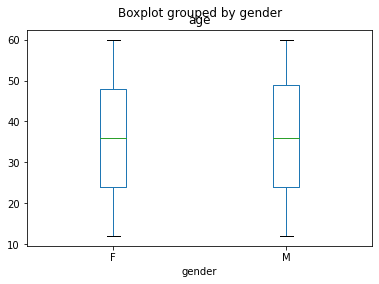

In [ ]:
data.boxplot(by ='gender', column =['age'], grid = False)

In [ ]:
# Check Outlier
# Q1, Q3, dan IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', data.shape)

# Removing outliers
data = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (Q1 - 1.5 * data['age'] > (Q3 - 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', data.shape)

Shape awal:  (149898, 10)
Shape akhir:  (149898, 10)


# EDA

## Data Transforming

In [ ]:
# Mengubah data timestamp
data['created_at'] = pd.to_datetime(data['created_at'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149898 entries, 0 to 162432
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              149898 non-null  int64         
 1   age             149898 non-null  int64         
 2   gender          149898 non-null  object        
 3   country         149898 non-null  object        
 4   traffic_source  149898 non-null  object        
 5   created_at      149898 non-null  datetime64[ns]
 6   latitude        149898 non-null  float64       
 7   longitude       149898 non-null  float64       
 8   category        149898 non-null  object        
 9   brand           149898 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 12.6+ MB


In [ ]:
# Menambahkan kategori umur
data['Kategori_umur'] = np.where(data["age"] <= 20 , 'Muda', "Dewasa")

In [ ]:
data['Kategori_umur'].value_counts()

Dewasa    122769
Muda       27129
Name: Kategori_umur, dtype: int64

In [ ]:
# mempersiapkan data yang akan diolah untuk model kan
data_final = data[['age','Kategori_umur', 'gender', 'country', 'traffic_source','category']]

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149898 entries, 0 to 162432
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             149898 non-null  int64 
 1   Kategori_umur   149898 non-null  object
 2   gender          149898 non-null  object
 3   country         149898 non-null  object
 4   traffic_source  149898 non-null  object
 5   category        149898 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.0+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(data_final.select_dtypes(include='object'))
X_onehot = pd.DataFrame(encoder.transform(data_final.select_dtypes('object')).toarray(), columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([data_final.select_dtypes(exclude='object'), X_onehot], axis=1)

In [ ]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162426 entries, 0 to 162432
Data columns (total 51 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     149898 non-null  float64
 1   Kategori_umur_Dewasa                    149898 non-null  float64
 2   Kategori_umur_Muda                      149898 non-null  float64
 3   gender_F                                149898 non-null  float64
 4   gender_M                                149898 non-null  float64
 5   country_Australia                       149898 non-null  float64
 6   country_Austria                         149898 non-null  float64
 7   country_Belgium                         149898 non-null  float64
 8   country_Brasil                          149898 non-null  float64
 9   country_China                           149898 non-null  float64
 10  country_Colombia                        1498

In [ ]:
X_preprocessed

,age,Kategori_umur_Dewasa,Kategori_umur_Muda,gender_F,gender_M,country_Australia,country_Austria,country_Belgium,country_Brasil,country_China,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,44.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162428,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162429,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162430,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162431,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_preprocessed.isnull().sum().sum()

638928

In [ ]:
Data_final_preprocessing = X_preprocessed.dropna(axis=0)

In [ ]:
Data_final_preprocessing.isnull().sum().sum()

0

In [ ]:
Data_final_preprocessing

,age,Kategori_umur_Dewasa,Kategori_umur_Muda,gender_F,gender_M,country_Australia,country_Austria,country_Belgium,country_Brasil,country_China,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,44.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149893,58.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149894,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149895,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149896,15.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Visualization

### Visualisasi jumlah user baru per tahun 

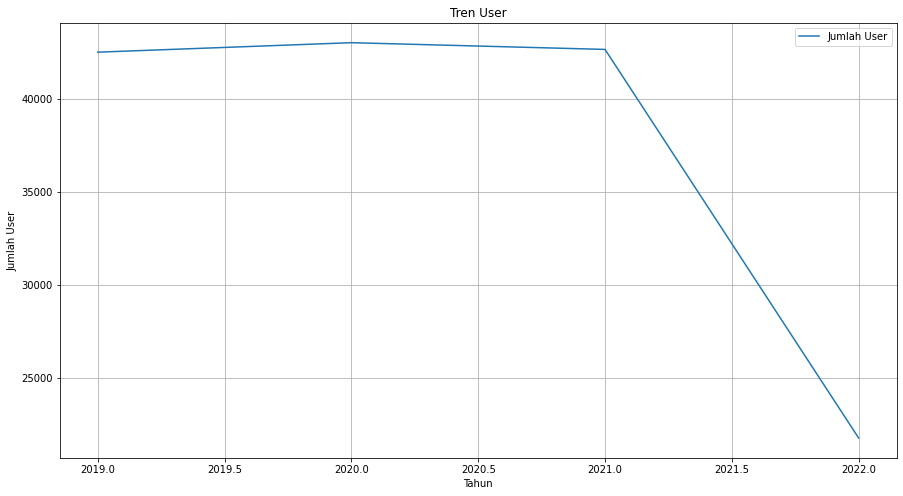

In [ ]:
data['tahun'] = data['created_at'].dt.year
jumlah = data[['tahun', 'age']]
jumlah_pengguna = jumlah.groupby(['tahun']).count().reset_index()
jumlah_pengguna

plt.figure(figsize=(15,8)) 
plt.grid()
sns.lineplot(x=jumlah_pengguna['tahun'],y=jumlah_pengguna['age'],label='Jumlah User')
plt.xlabel('Tahun')
plt.ylabel('Jumlah User')
plt.title('Tren User')
plt.show()

In [ ]:
def visualisasi(data, x=None, y=None, palette=None, figsize=(20, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

### Jumlah user pada setiap umur

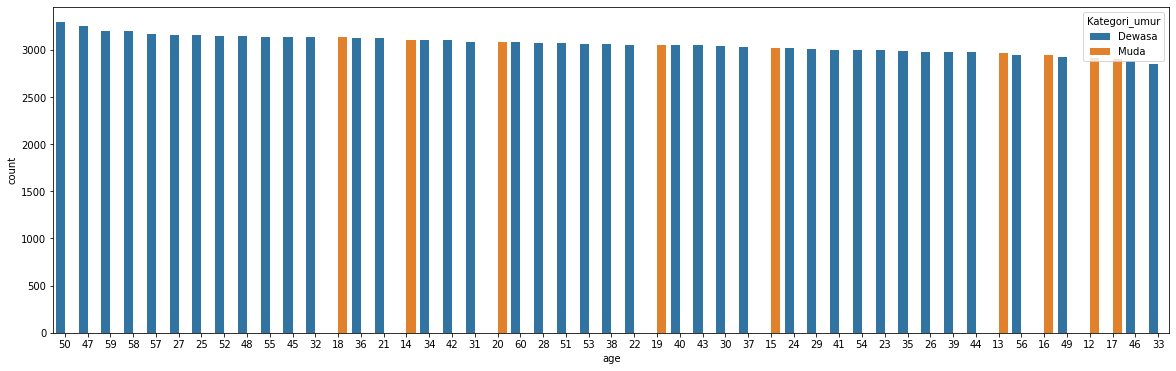

In [ ]:
visualisasi(data=data ,x='age', hue='Kategori_umur')


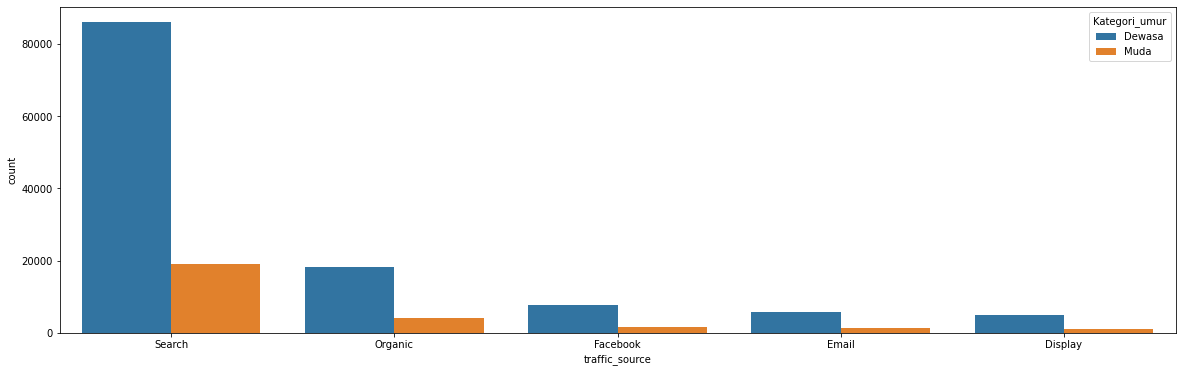

In [ ]:
visualisasi(data=data, x='traffic_source', hue='Kategori_umur')

### Jumlah user yang memesan berdasarkan Category

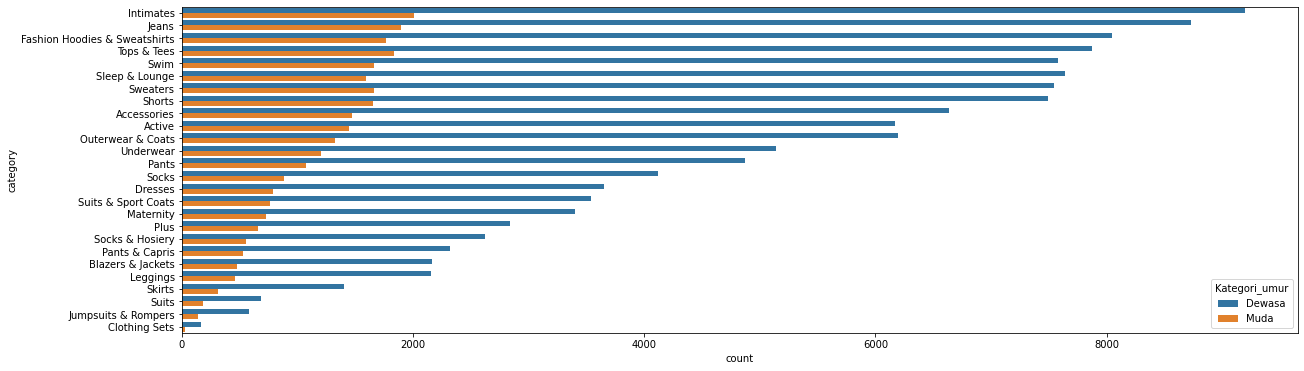

In [ ]:
visualisasi(data=data, y='category', hue='Kategori_umur')

### Jumlah user berdasarkan Negara

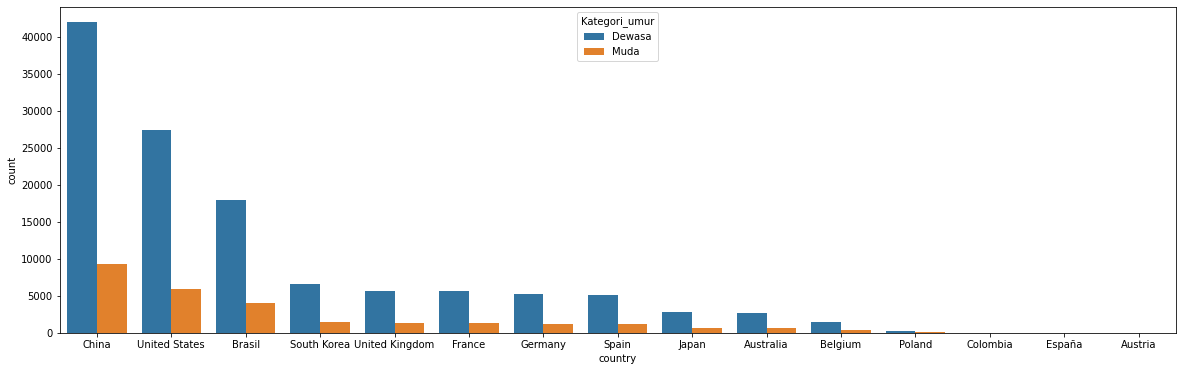

In [ ]:
visualisasi(data=data, x='country', hue='Kategori_umur')

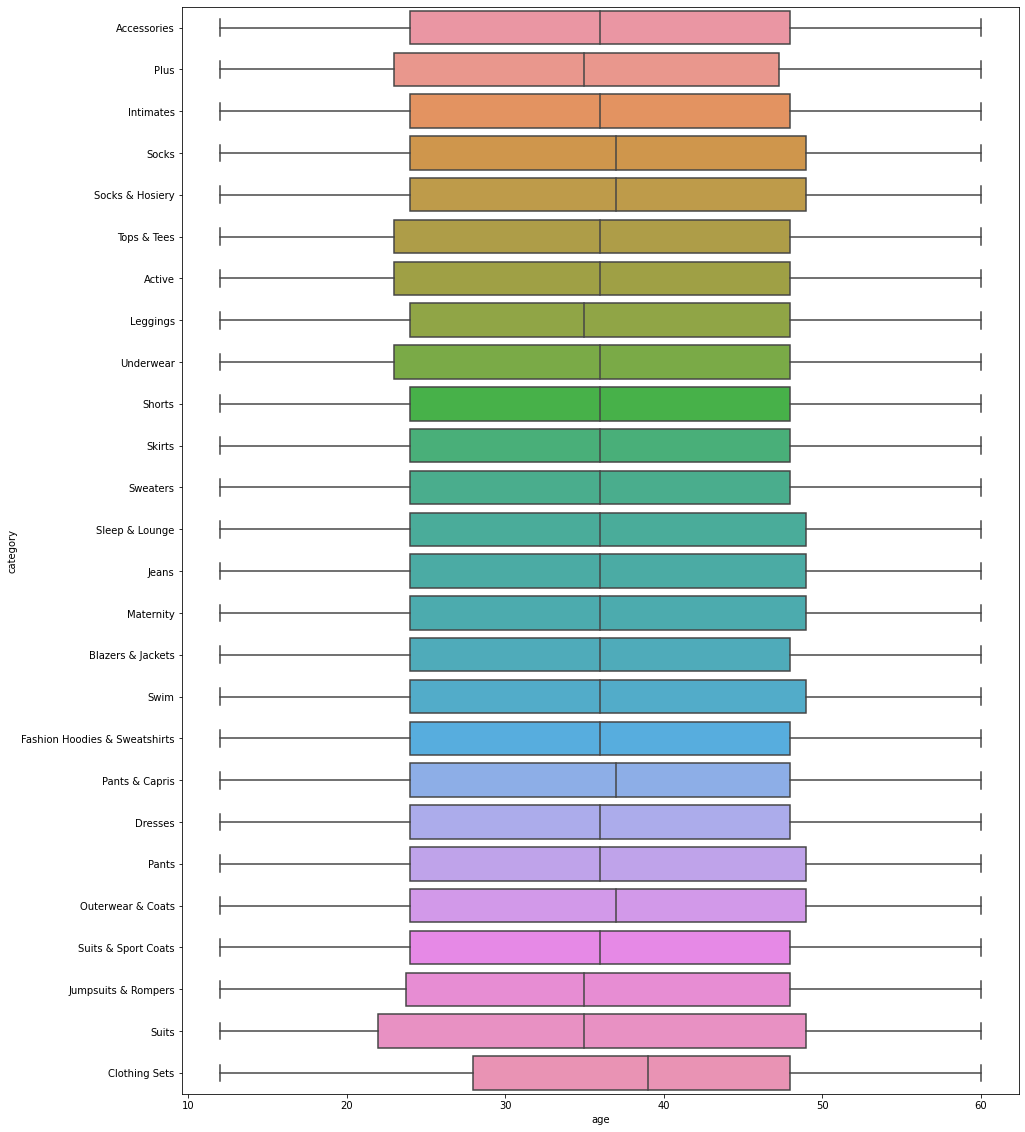

In [ ]:
plt.figure(figsize = (15,20))
sns.boxplot(data = data, x='age', y='category')

# Modelling

Checkpoint 4 akan dilaksanakan pada Selasa dan Rabu tanggal 21-22 Juni. Berikut aspek penilaian untuk Cp4

1. Mampu menentukan analisis/model yg akan digunakan
2. Mampu menentukan variabel dependent, independent dan data split (train, test, validation)
3. Mampu memasukkan data ke dalam model dan mengeluarkan metrics dari model yg relevan (contoh: accuracy score, RMSE, f1, precision/recall, dll)
4. Menginterpretasikan hasil model, bisa dalam bentuk visual

notes sebelum mulai cp4:
1. Bagi yang belum sempat/tidak hadir dalam cp3 waktu lalu mohon segera melengkapi pekerjaannya dan menunjukkan kepada instruktur melalui dm discord

In [ ]:
Data_final_preprocessing

,age,Kategori_umur_Dewasa,Kategori_umur_Muda,gender_F,gender_M,country_Australia,country_Austria,country_Belgium,country_Brasil,country_China,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,44.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149893,58.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149894,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149895,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149896,15.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## K-Modes

### Version 1

In [ ]:
data_final

,age,Kategori_umur,gender,country,traffic_source,category
0,44,Dewasa,F,China,Email,Accessories
1,45,Dewasa,F,Spain,Organic,Accessories
2,41,Dewasa,M,China,Search,Accessories
3,14,Muda,M,South Korea,Search,Accessories
4,50,Dewasa,M,Australia,Search,Accessories
...,...,...,...,...,...,...
162428,18,Muda,F,Belgium,Search,Tops & Tees
162429,57,Dewasa,F,China,Search,Shorts
162430,44,Dewasa,F,United States,Search,Tops & Tees
162431,23,Dewasa,F,Australia,Search,Tops & Tees


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149898 entries, 0 to 162432
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             149898 non-null  int64 
 1   Kategori_umur   149898 non-null  object
 2   gender          149898 non-null  object
 3   country         149898 non-null  object
 4   traffic_source  149898 non-null  object
 5   category        149898 non-null  object
 6   Cluster         149898 non-null  uint16
dtypes: int64(1), object(5), uint16(1)
memory usage: 12.3+ MB


In [ ]:
data_final.to_csv('data_tanpa_labelling.csv')

In [ ]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 530737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 457030.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 437669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 418560.0


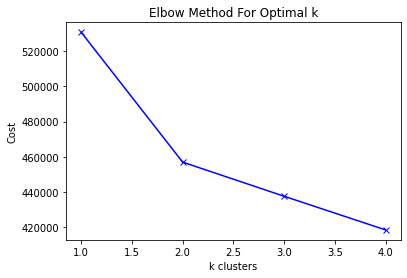

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data_final)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(data_final)
data_final['Cluster'] = cluster_labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 457030.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_final

,age,Kategori_umur,gender,country,traffic_source,category,Cluster
0,44,Dewasa,F,China,Email,Accessories,0
1,45,Dewasa,F,Spain,Organic,Accessories,0
2,41,Dewasa,M,China,Search,Accessories,0
3,14,Muda,M,South Korea,Search,Accessories,1
4,50,Dewasa,M,Australia,Search,Accessories,0
...,...,...,...,...,...,...,...
162428,18,Muda,F,Belgium,Search,Tops & Tees,0
162429,57,Dewasa,F,China,Search,Shorts,0
162430,44,Dewasa,F,United States,Search,Tops & Tees,0
162431,23,Dewasa,F,Australia,Search,Tops & Tees,0


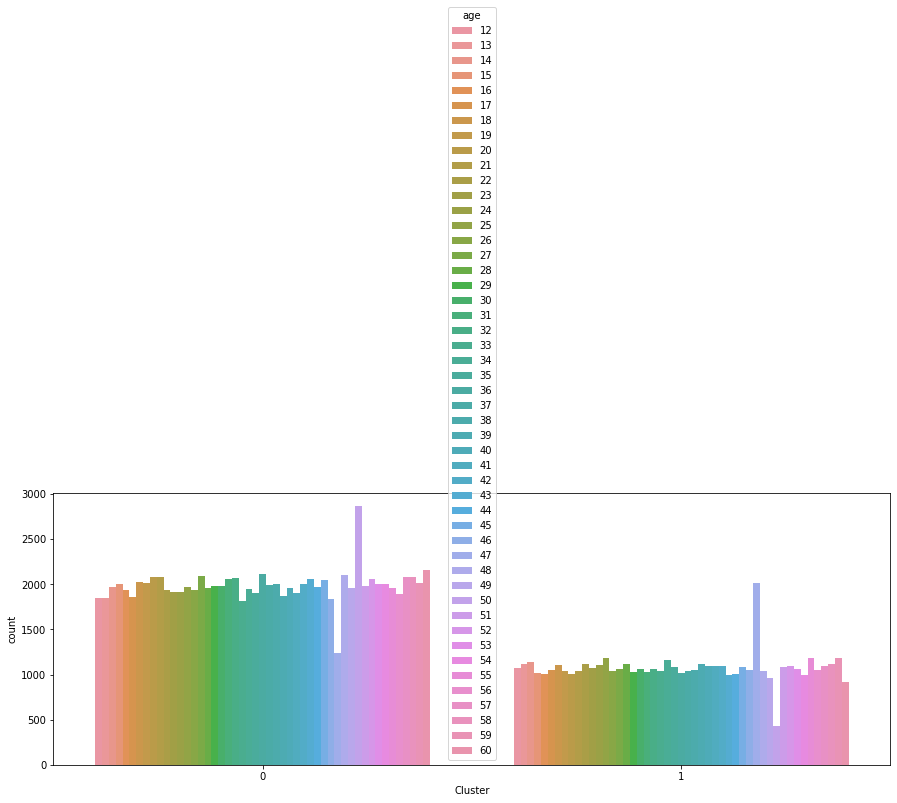

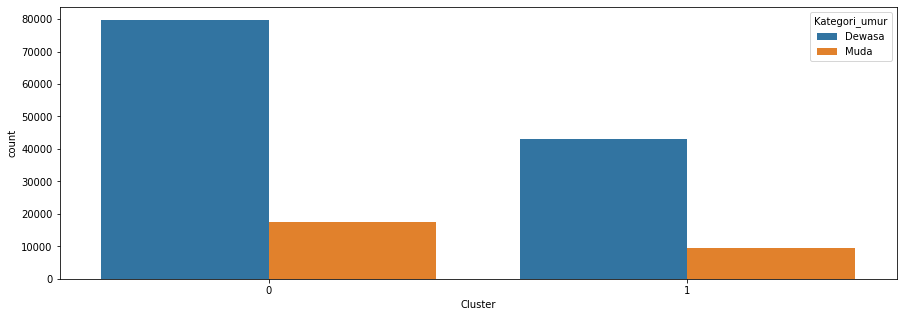

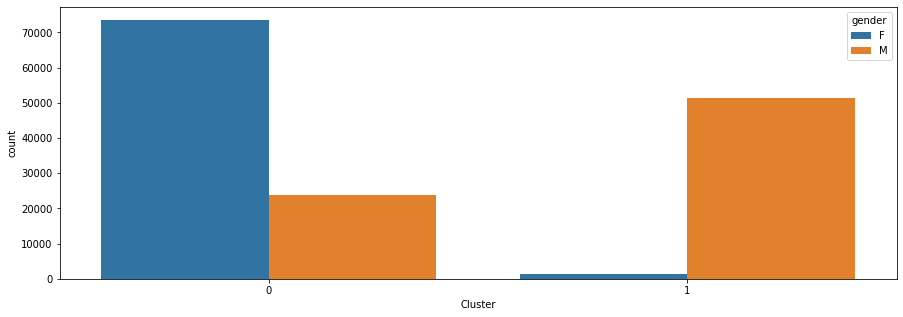

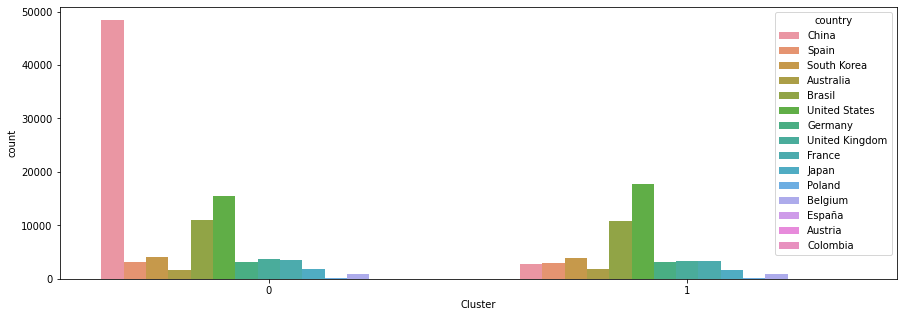

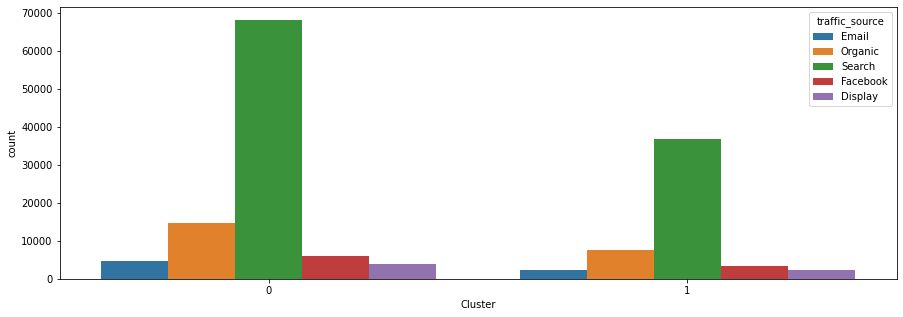

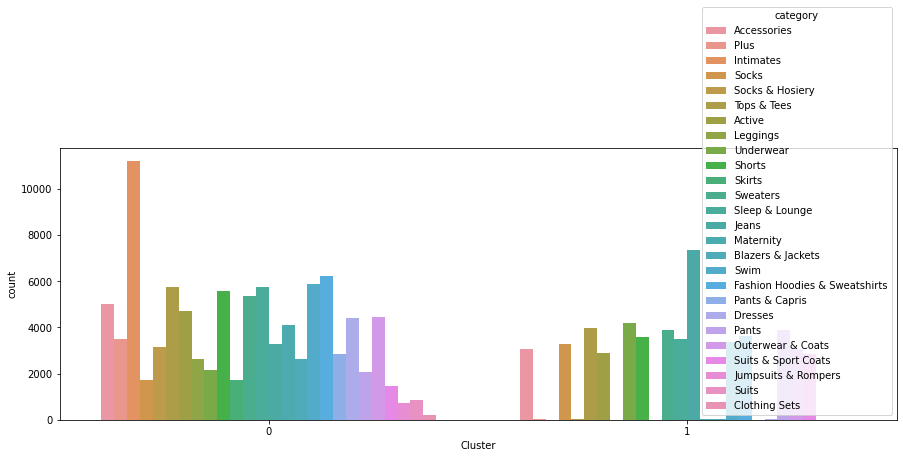

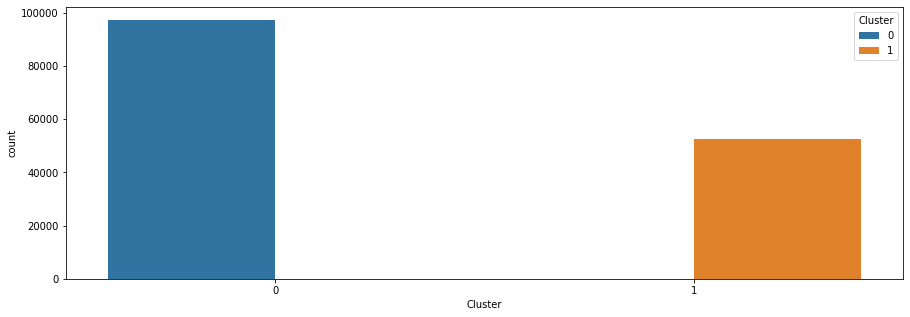

In [ ]:
for col in data_final:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_final)
    plt.show()

In [ ]:
labels1 = km.labels_

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
data = data_final.copy()

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoded_data = data.apply(encoder.fit_transform)
encoded_data.head()

,age,Kategori_umur,gender,country,traffic_source,category,Cluster
0,32,0,0,4,1,0,0
1,33,0,0,12,3,0,0
2,29,0,1,4,4,0,0
3,2,1,1,11,4,0,1
4,38,0,1,0,4,0,0


In [ ]:
encoded_data.to_csv("data_encoded.csv")

In [ ]:
print(silhouette_score(encoded_data, labels= labels1))

0.01846021525834837


### Version 2

In [ ]:
data = data_final.copy()

In [ ]:
data.nunique()

age               49
Kategori_umur      2
gender             2
country           15
traffic_source     5
category          26
Cluster            2
dtype: int64

In [ ]:
data = data.drop(['Cluster'], axis=1)

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoded_data = data.apply(encoder.fit_transform)
encoded_data.head()

,age,Kategori_umur,gender,country,traffic_source,category
0,32,0,0,4,1,0
1,33,0,0,12,3,0
2,29,0,1,4,4,0
3,2,1,1,11,4,0
4,38,0,1,0,4,0


In [ ]:
km2 = KModes(n_clusters=2, init='cao',n_init=1, verbose=1)
clusters = km2.fit_predict(encoded_data)
predicted_labels = pd.DataFrame(clusters, columns=['predicted-label'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 457030.0


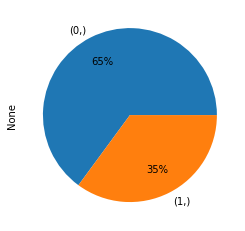

In [ ]:
predicted_labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [ ]:
data['predicted-labels'] = clusters

In [ ]:
target = data_final[['Cluster']]

In [ ]:
encoded_target = target.apply(encoder.fit_transform)
print(f'in this encoding, {encoded_target.iloc[0].values} represents {target.iloc[0].values}')

in this encoding, [0] represents [0]


In [ ]:
labels = pd.DataFrame()
labels['target'] = target.values.reshape(1, -1).tolist()[0]
labels['prediction'] = clusters
labels.value_counts(["target", "prediction"])

target  prediction
0       0             97306
1       1             52592
dtype: int64

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

In [ ]:
ri = rand_score(target.values.reshape(1, -1)[0], clusters)
ari = adjusted_rand_score(target.values.reshape(1, -1)[0], clusters)

print(f'Rand Index: {ri}')
print(f'Adjusted Rand Index: {ari}')

Rand Index: 1.0
Adjusted Rand Index: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

Text(0.5, 15.0, 'Predicted Labels')

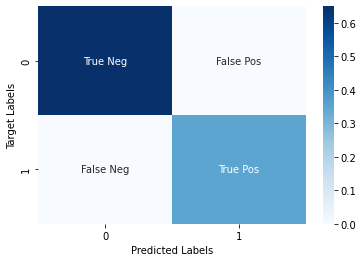

In [ ]:
cf_matrix = confusion_matrix(encoded_target.values.reshape(1, -1)[0], clusters)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [ ]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1_score: 1.0


In [ ]:
km = KModes(n_clusters=2, init='Huang', n_init=1, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17367, cost: 543612.0
Run 1, iteration: 2/100, moves: 3667, cost: 543612.0
[['50' 'Dewasa' 'M' 'China' 'Search' 'Jeans' '0']
 ['19' 'Muda' 'F' 'China' 'Search' 'Intimates' '0']]


Catatan dari instruktur
- membuat table kmode dengan encode dan without
- membuat table unit nya cao dan huan
- silhoute score
- membuat kesimpulan berdasarkan seluruhnya

## K-Means

In [ ]:
scaler = StandardScaler()
scaler.fit(Data_final_preprocessing)
X_scaled = pd.DataFrame(scaler.transform(Data_final_preprocessing), columns=Data_final_preprocessing.columns)

In [ ]:
X_scaled

,age,Kategori_umur_Dewasa,Kategori_umur_Muda,gender_F,gender_M,country_Australia,country_Austria,country_Belgium,country_Brasil,country_China,...,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear
0,0.554447,0.470581,-0.470581,1.001282,-1.001282,-0.151268,-0.007139,-0.111873,-0.413232,1.386123,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
1,0.625136,0.470581,-0.470581,1.001282,-1.001282,-0.151268,-0.007139,-0.111873,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
2,0.342381,0.470581,-0.470581,-0.998720,0.998720,-0.151268,-0.007139,-0.111873,-0.413232,1.386123,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
3,-1.566221,-2.125032,2.125032,-0.998720,0.998720,-0.151268,-0.007139,-0.111873,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
4,0.978581,0.470581,-0.470581,-0.998720,0.998720,6.610767,-0.007139,-0.111873,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137365,1.544093,-2.125032,2.125032,1.001282,-1.001282,-0.151268,-0.007139,8.938739,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,3.802061,-0.198133
137366,-1.495532,0.470581,-0.470581,1.001282,-1.001282,-0.151268,-0.007139,-0.111873,-0.413232,1.386123,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,-0.263015,-0.198133
137367,-1.707599,0.470581,-0.470581,1.001282,-1.001282,-0.151268,-0.007139,-0.111873,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,3.802061,-0.198133
137368,-1.495532,0.470581,-0.470581,1.001282,-1.001282,6.610767,-0.007139,-0.111873,-0.413232,-0.721437,...,-0.109173,-0.254074,-0.183015,-0.145868,-0.077493,-0.176739,-0.25915,-0.254982,3.802061,-0.198133


Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur ini berkorelasi, dan karenanya berlebihan. Inilah sebabnya mengapa saya akan melakukan dimensionality reduction pada fitur yang dipilih sebelum menempatkannya melalui pengklasifikasi.
dimensionality reduction adalah proses mengurangi jumlah variabel acak yang dipertimbangkan, dengan memperoleh satu set variabel utama.

Principal component analysis (PCA) adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)
PCA_ds = pd.DataFrame(pca.transform(X_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,137370.0,2.060714e-16,1.602584,-2.745269,-1.402835,-1.245724,1.947317,2.864501
col2,137370.0,4.717296e-17,1.414595,-1.492792,-0.682448,-0.653294,-0.607103,4.000069
col3,137370.0,4.965575e-18,1.336342,-2.356627,-0.894196,-0.835400,1.822132,3.174405


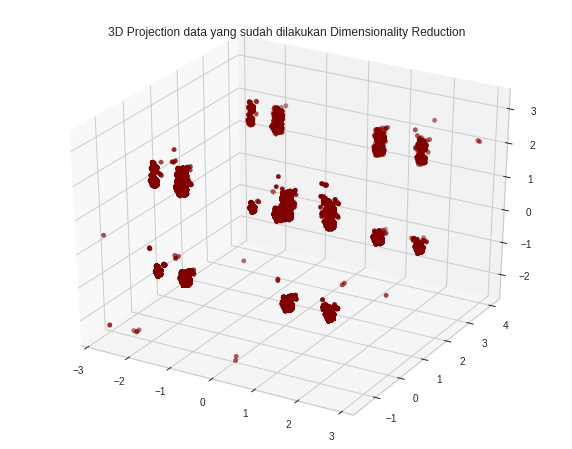

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D Projection data yang sudah dilakukan Dimensionality Reduction")
plt.show()

Elbow Method untuk melihat nilai k yang terbaik :


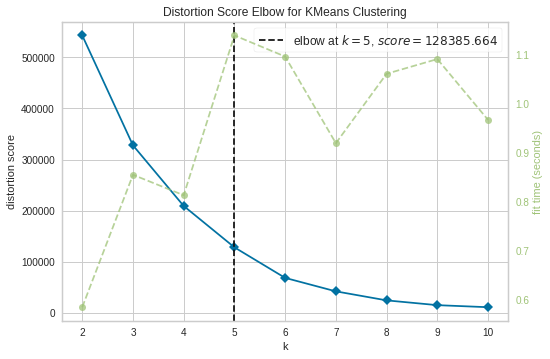

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method untuk melihat nilai k yang terbaik :')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
KM = KMeans(n_clusters=5)
# fit model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
Data_final_preprocessing["Clusters"]= yhat_KM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


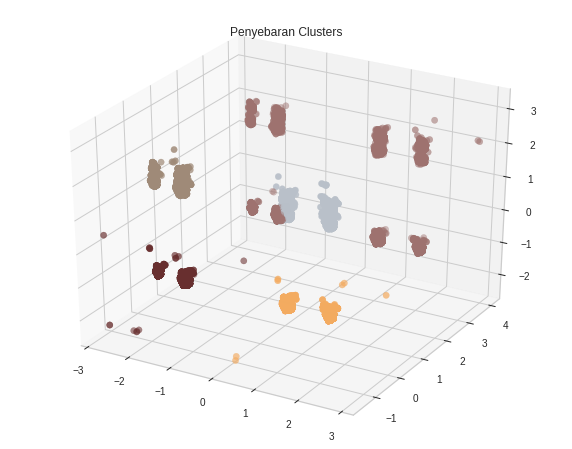

In [ ]:
from matplotlib import colors
from matplotlib.colors import ListedColormap
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("Penyebaran Clusters")
plt.show()

# Evaluation

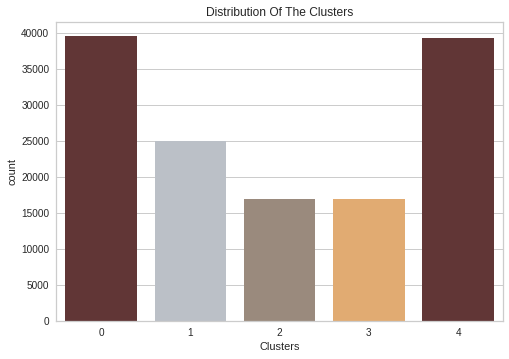

In [ ]:
import seaborn as sns
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=Data_final_preprocessing["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
print(silhouette_score(Data_final_preprocessing, labels= Data_final_preprocessing["Clusters"]))

0.015259866100620217
